# Linear Regression

We will be using the Production data of Eight Core Industries in India. The data is available at: https://data.gov.in/node/770061/datastore/export/csv.

#### Loading libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Exploratory Analysis

Data by itself is not useful. We must have well-defined problems before we seek the data to answer them. Suppose we want to find the trends in electricity production in India and then use that to answer questions about future production.

We use the `pandas` library to handle data and do some preliminary analysis.

In [70]:
import os
path = os.path.join(os.getcwd(), 'industry_data.csv') # load the data
data = pd.read_csv(path, header='infer')
data.head()

,Months/Years,Production of Coal (in Million Tonnes),Production of Crude Oil (in Thousand Tonnes),Production of Natural Gas (in Million cubic meters),Production of Petroleum Refinery Products $ (in Thousand Tonnes),Production of Fertilizers (in Thoousand Tonnes),Production of Steel (in Thousand Tonnes),Production of Cement (in Thousand Tonnes),Electricity Generation (in Million KWH)
0,Apr-04,28.2,2814.0,2596.0,9694.3,2306.7,3283.0,11140.0,48930.0
1,May-04,27.6,2886.0,2650.0,10233.7,2705.5,3487.0,10950.0,47981.0
2,Jun-04,27.6,2783.0,2514.0,10002.2,2754.6,3427.0,10300.0,46570.0
3,Jul-04,28.6,2864.0,2658.0,9745.5,2910.1,3585.0,10768.0,50283.0
4,Aug-04,26.2,2874.0,2662.0,9796.6,2913.3,3561.0,9355.0,48325.0


In [71]:
data.describe()

,Production of Coal (in Million Tonnes),Production of Crude Oil (in Thousand Tonnes),Production of Natural Gas (in Million cubic meters),Production of Petroleum Refinery Products $ (in Thousand Tonnes),Production of Fertilizers (in Thoousand Tonnes),Production of Steel (in Thousand Tonnes),Production of Cement (in Thousand Tonnes),Electricity Generation (in Million KWH)
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,42.486986,2968.331507,3119.042534,13708.269863,3007.563699,5660.198630,17544.452055,68378.919863
std,9.766447,200.472960,630.946493,2930.755045,320.001372,1437.311929,4281.116736,14111.686351
min,26.200000,2411.000000,1966.000000,8946.600000,2161.300000,3283.000000,9355.000000,46015.800000
25%,35.100000,2815.000000,2697.000000,11677.975000,2801.150000,4508.750000,13935.000000,57131.700000
50%,40.900000,2926.500000,2826.950000,12662.750000,3067.550000,5495.500000,17695.000000,65561.600000
75%,48.475000,3157.875000,3572.875000,16837.750000,3227.875000,6939.500000,21074.500000,78593.725000
max,69.400000,3362.600000,4789.300000,19886.300000,3673.600000,8616.000000,26821.000000,99817.500000


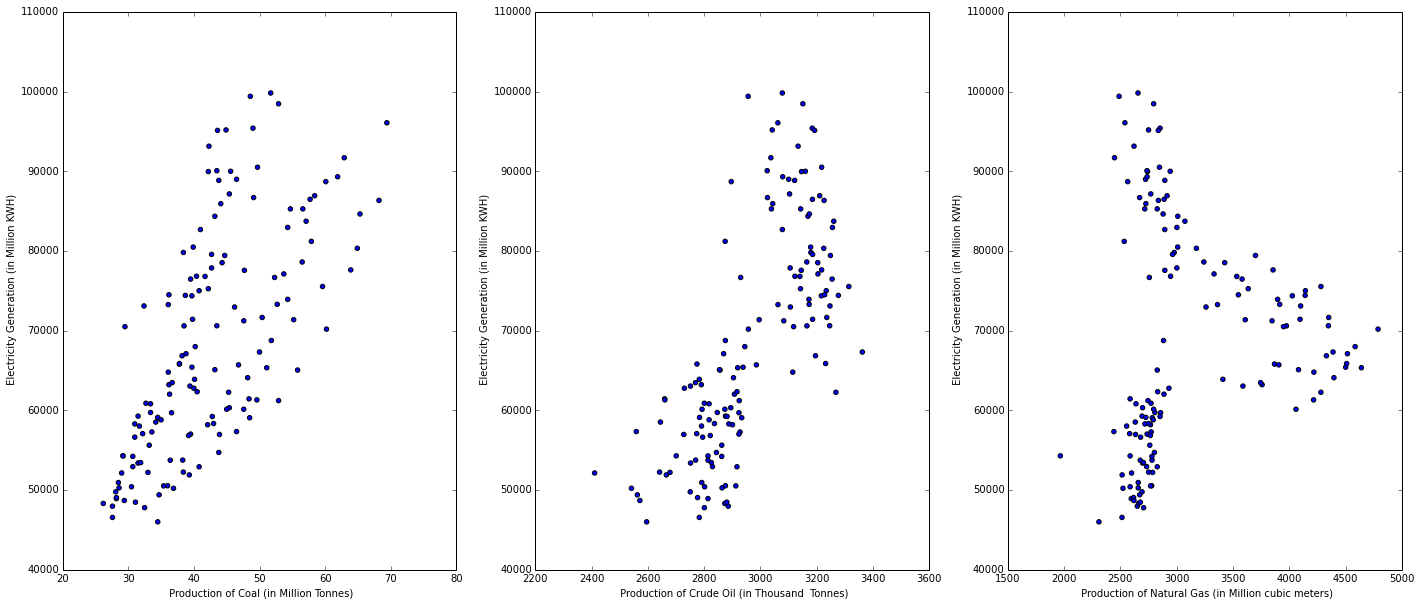

In [72]:
fig, ax = plt.subplots(1, 3);
data.plot(kind='scatter', x=1, y=8, ax=ax[0], figsize=(24, 10))
data.plot(kind='scatter', x=2, y=8, ax=ax[1], figsize=(24, 10))
data.plot(kind='scatter', x=3, y=8, ax=ax[2], figsize=(24, 10))


Our analysis seems to indicate that Coal production is a much better indicator of Electricity production when compared to Natural gas and crude oil production. This also bolsters our intuition that most electricity in India is produced by coal based power plants. Note that correlation **does not** imply causation and as such we should not make such an assumption. Nevertheless, for the purpose of this tutorial, we'll assume Coal production to be directly proportional to Electricity Production.

## Linear Regression

Now, suppose we wish to predict the future electricity production given that we have some estimate of the future coal production. To do so, we find a function $h_{\theta}$ parameterized by parameters $\theta$ which gives us the Electricity production of a month given the coal production of that month. We also call $h_{\theta}$ a linear model since it is linear in the parameter $\theta$. Our objective is to find $h_{\theta}$ such that it fits the observed data.

Mathematically, we write $h_{\theta}$ as:
$$h_{\theta} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$$
where $\mathbf{\theta} = ({\theta_0}, \theta_1, \theta_2 \ldots, \theta_n)$ are the parameters and $x_1, x_2, \ldots, x_n$ are the explanatory variables. In our specific case, we have only one explanatory variable (i.e. the monthy Coal Production).

The goal is the minimize the difference between the predicted value $h_{\theta} (x^{(i)})$ for a specific instance $i$ of the values of the set of explanatory variables and the actual value $y^{(i)}$ of the dependant variable for that specific instance.

Mathematically, we wish to minimize $J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)} - y^{(i)})^2$ for all of $m$ **training cases** that we have. The $\frac{1}{2}$ multiplier of the expression is for mathematical convenience.

## Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset
using gradient descent.

### Update Equations

The objective of linear regression is to minimize the cost function:
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)} - y^{(i)})^2 $$

where the hypothesis $h_{\theta}(x)$ is given by the linear model $h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$.

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update
$$ \theta_j := \theta_j − \alpha \frac{1}{m} \sum_{i}^{m}\nabla_{\theta_j}(J(\theta)) $$

With each step of gradient descent, your parameters $\theta_{j}$ come closer to the
optimal values that will achieve the lowest cost $J(\theta)$.

### Model Fitting

To perform linear regression, we'll use `scikit-learn`, a python library that that includes tools for machine learning and data analysis.

In [73]:
# get relevant data from the pandas data frame
coal_data = data.iloc[:, 1]
elec_data = data.iloc[:, 8]

In [74]:
# view the data
coal_data.head()

0    28.2
1    27.6
2    27.6
3    28.6
4    26.2
Name:  Production of Coal (in Million Tonnes), dtype: float64

In [75]:
elec_data.head()

0    48930.0
1    47981.0
2    46570.0
3    50283.0
4    48325.0
Name:  Electricity Generation (in Million KWH), dtype: float64

For demonstration purpose, we split the data into test and training data. The test data is the data that is used to evaluate the accuracy of a particular model. Note that the test data is never used for training the model and is used only for evaluation. The performance of a model on test data is an estimate of its performance in the real world.

In [83]:
# splitting the data
rng = np.random.RandomState(0);

# Only data values needed for model fitting
X = np.matrix(coal_data.values).transpose()
y = np.matrix(elec_data.values).transpose()

# get split
n, p = 1, 0.2
s = rng.binomial(n, p, data.shape[0])

X_train, y_train = X[s==0], y[s==0]
X_test, y_test   = X[s==1], y[s==1]

In [94]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=True, normalize=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f" % np.mean(np.power((regr.predict(X_test) - y_test), 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([[ 947.81883853]]))
Residual sum of squares: 113498986.63
Variance score: 0.52


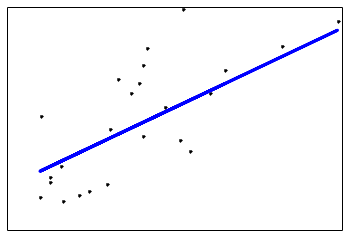

In [93]:
plt.plot(X_test, y_test,  '.', color='black')
plt.plot(np.squeeze(np.array(X_test)), np.squeeze(regr.predict(X_test)), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()